In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

from astropy.coordinates import EarthLocation, AltAz, get_body
import astropy.units as u
import time, subprocess
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set('jpl')  
solar_system_ephemeris.bodies

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
joe_loc = EarthLocation(lat=38.438*u.deg,lon=-121.208*u.deg,height=100*u.m)

scott_loc = EarthLocation(lat=49.4348*u.deg,lon=-123.4348*u.deg,height=40*u.m)

In [3]:
joe_data = np.fromfile('/media/scott/data/arc/20210301/tw1_joe_20210301.dat', sep = ' ').reshape((-1,4))
joe_t_data = Time(joe_data[:,0], format = 'mjd')
joe_freq_data = joe_data[:,1]

In [4]:
scott_data = np.fromfile('/media/scott/data/arc/20210301/tw1_scott_20210301.dat', sep = ' ').reshape((-1,4))
scott_t_data = Time(scott_data[:,0], format = 'mjd')
scott_freq_data = scott_data[:,1]

scott_interp = np.interp(joe_t_data.utc.mjd, scott_t_data.utc.mjd, scott_freq_data)

In [5]:
freq_diff = joe_freq_data - scott_interp
np_diff = np.array(freq_diff)

mean = np.mean(np_diff)
print(mean)

adj_np_diff = np_diff - mean

121300.26421406976


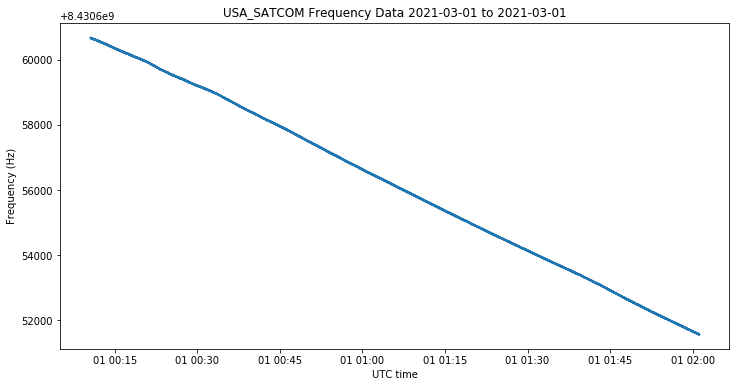

In [6]:
plt.plot(joe_t_data.datetime,joe_freq_data,'.',markersize=1,  label = 'strf file')
plt.title('USA_SATCOM Frequency Data %s to %s'%(joe_t_data.datetime[0].strftime('%Y-%m-%d'), joe_t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show();

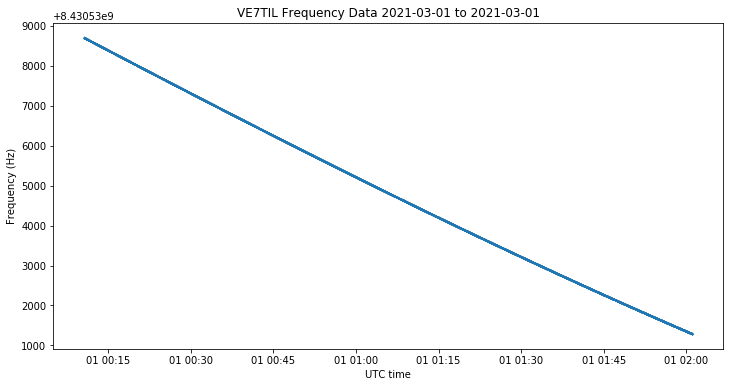

In [7]:
plt.plot(joe_t_data.datetime,scott_interp,'.',markersize=1,  label = 'strf file')
plt.title('VE7TIL Frequency Data %s to %s'%(joe_t_data.datetime[0].strftime('%Y-%m-%d'), joe_t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show();

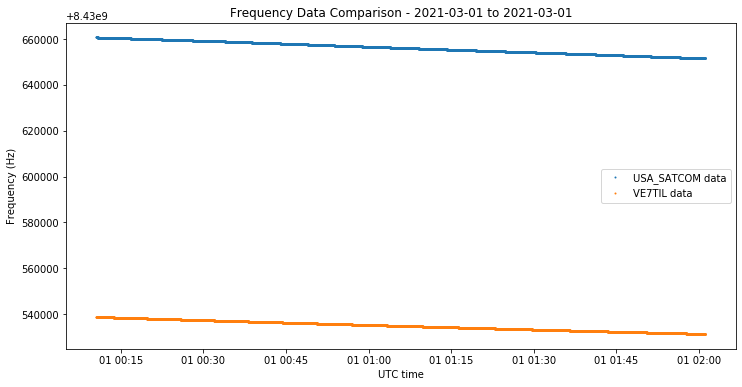

In [8]:
plt.plot(joe_t_data.datetime, joe_freq_data,'.', markersize=2,alpha=1,label = 'USA_SATCOM data')
plt.plot(joe_t_data.datetime,scott_interp,'.' ,markersize=2, alpha=1, label = 'VE7TIL data')
plt.title('Frequency Data Comparison - %s to %s'%(joe_t_data.datetime[0].strftime('%Y-%m-%d'), joe_t_data.datetime[len(joe_freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

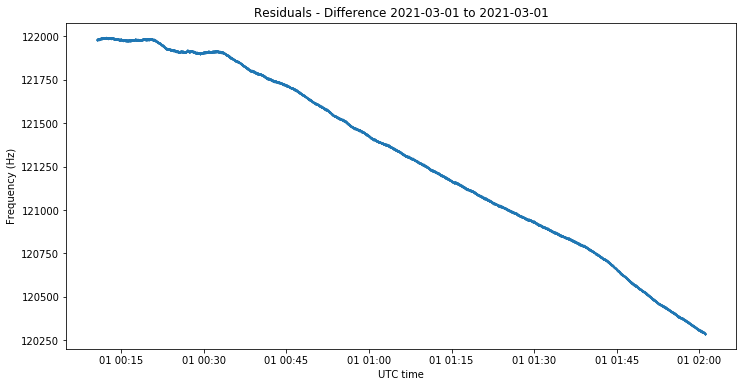

In [9]:
#plt.ylim(np.min(np_diff), np.max(np_diff))
plt.plot(joe_t_data.datetime,np_diff,'.',markersize=1,  label = 'strf file')
plt.title('Residuals - Difference %s to %s'%(joe_t_data.datetime[0].strftime('%Y-%m-%d'), joe_t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show();

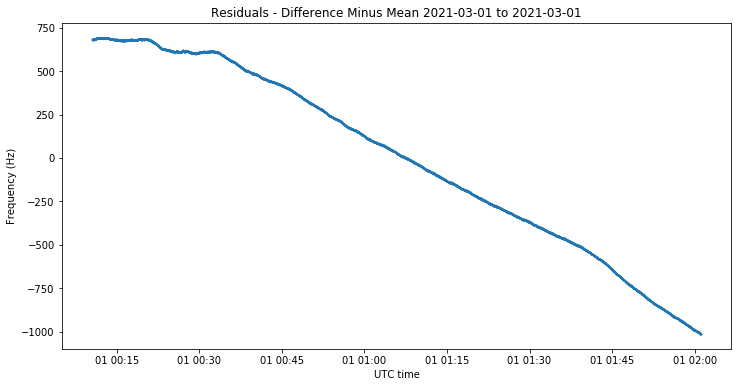

In [10]:
#plt.ylim(np.min(np_diff), np.max(np_diff))
plt.plot(joe_t_data.datetime,adj_np_diff,'.',markersize=1,  label = 'strf file')
plt.title('Residuals - Difference Minus Mean %s to %s'%(joe_t_data.datetime[0].strftime('%Y-%m-%d'), joe_t_data.datetime[len(freq_diff)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show();

In [11]:
joe_mars = get_body('mars',joe_t_data).transform_to(AltAz(obstime=joe_t_data,location=joe_loc))
scott_mars = get_body('mars',joe_t_data).transform_to(AltAz(obstime=joe_t_data,location=scott_loc))  

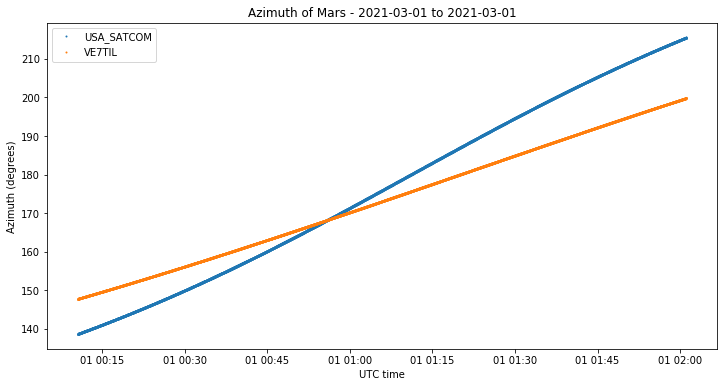

In [12]:
plt.plot(joe_t_data.datetime, joe_mars.az.deg,'.', markersize=2,alpha=1,label = 'USA_SATCOM')
plt.plot(joe_t_data.datetime,scott_mars.az.deg,'.' ,markersize=2, alpha=1, label = 'VE7TIL')
plt.title('Azimuth of Mars - %s to %s'%(joe_t_data.datetime[0].strftime('%Y-%m-%d'), joe_t_data.datetime[len(joe_freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Azimuth (degrees)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

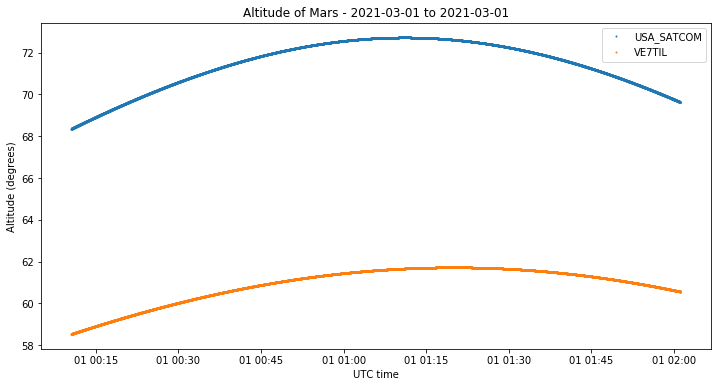

In [13]:
plt.plot(joe_t_data.datetime, joe_mars.alt.deg,'.', markersize=2,alpha=1,label = 'USA_SATCOM')
plt.plot(joe_t_data.datetime,scott_mars.alt.deg,'.' ,markersize=2, alpha=1, label = 'VE7TIL')
plt.title('Altitude of Mars - %s to %s'%(joe_t_data.datetime[0].strftime('%Y-%m-%d'), joe_t_data.datetime[len(joe_freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Altitude (degrees)')
plt.xlabel('UTC time')
plt.legend()
plt.show();